# Markowitz Portfolio Optimization

Markowitz, a 20th century economist, published a paper in 1952 that detailed how to develop a portfolio that maximized return for the lowest possible risk.

The following notebook represents notes taken from the *Python for Finance: Investment Fundamentals & Data Analytics* Udemy course. All credit for the content of the lecture goes to 365 Cereers.

## Table of Contents:
---
1. [Markowitz Efficient Portfolio Theory](#Theory)
2. [Obtaining Efficient Portfolios](#Application)

## <a name="Theory"></a> Markowitz Efficient Portfolio Theory
---

In particular, Markowitz is interested in eliminating *idiosyncratic risk*, which is the risk caused by the peculiarities of single invesments caused by such factors as the competence of their executives or the management of their supply chain. By diversifying your portfolio, you can control for these idiosyncracies.

Diversified portfolios will generate higher returns without taking on excessive risk. This can be achieved by starting with a series of invesments with very little correlation to each other. When a particular industry is affected, the security on that industry will be affected, but the securities in unrelated industries will remain strong and the portfolio will absorb the blow.

Markowitz proved that there are efficient portfolios which can be found and optimized for. He related the return of a series of securities to their standard deviations, a measure of their volatility, and found that there exists an efficient frontier of portfolios which can generate the best returns for their risk tolerance. Provided that you are on the frontier, you are at maximum efficiency. To be farther away from the frontier is to take on lower returns for your risk level.

<img name="Frontier" src="Figures\Markowitz.Frontier.JPG" alt="Drawing" style="width: 400px;" align = "right"/>

Looking at the figure to the right, the upper edge of the plane represents the efficient frontier. As we move to the right, we take on more volatility but we get greater returns, provided that we are using one of the efficient portfolios.

Let's grab some data and take a look at our own efficient frontier. Consider the following security data:

|  -                 | Security A | Security B |
|--------------------|------------|------------|
| Expected Return    | 7  %       | 9 %        |
| Standard Deviation | 5  %       | 8 %        |

The correlation between A and B is 30% (0.30) which is close enough to zero for our purposes. Next consider that we create different portfolios using varying weights between the two securities. We can find the expected returns of the hypothetical portfolio using the vector sum of the expected return and their weights.

We can find the standard deviation of the portfolio using the following equation:

$
( w_1 \sigma_1 + w_2 \sigma_2 )^{2} = w_1^2 \sigma_1^2 + 2 w_1 \sigma_1 w_2 \sigma_2 \rho_{12} + w_2^2 \sigma_2^2
$

Here $\sigma_n$ represents the standard deviation of security $n$, $w_n$ equals the weight of security $n$ within the portfolio, and $\rho_{12}$ equals the correlation between securities one and two. Charting our data we are left with the following:

| -            | Weight A | Weight B | Expected Return | Standard Deviation |
|--------------|----------|----------|-----------------|--------------------|
| Portfolio 0  | 100  %   | 0   %    | 7.00 %          | 0.05               |
| Portfolio 1  | 90   %   | 10  %    | 7.20 %          | 0.048010416        |
| Portfolio 2  | 80   %   | 20  %    | 7.40 %          | 0.047328638        |
| Portfolio 3  | 70   %   | 30  %    | 7.60 %          | 0.048010416        |
| Portfolio 4  | 60   %   | 40  %    | 7.80 %          | 0.05               |
| Portfolio 5  | 50   %   | 50  %    | 8.00 %          | 0.053150729        |
| Portfolio 6  | 40   %   | 60  %    | 8.20 %          | 0.057271284        |
| Portfolio 7  | 30   %   | 70  %    | 8.40 %          | 0.062169124        |
| Portfolio 8  | 20   %   | 80  %    | 8.60 %          | 0.067675697        |
| Portfolio 9  | 10   %   | 90  %    | 8.80 %          | 0.073654599        |
| Portfolio 10 | 0    %   | 100 %    | 9.00 %          | 0.08               |

By plotting the expected return over the standard deviation we achieve a graph of our Markowitz Frontier.

<img name="CustomFrontier" src="Figures\Custom.Frontier.JPG" alt="Drawing" style="width: 400px;"/>

This is how we arrive at a frontier, by changing the weights until we have found the right combination. As the number of assets increases, so too does the complexity of this calculation and the permutations become more arduous to compute.

## <a name="Application"></a> Obtaining Efficient Portfolios
---

Here we will consider a portfolio with only two assets involed: Proctor & Gamble and the S&P500

In [1]:
# -------- IMPORT LIBRARIES -------- #
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

# -------- DOWNLOAD DATA -------- #
assets = 'PG ^GSPC'.split()
Portfolio = pd.DataFrame()

for a in assets:
    Portfolio[a] = wb.DataReader(a, data_source = "yahoo", start = '2010-1-1')['Adj Close']
    
Portfolio.tail(5)

,PG,^GSPC
Date,,
2019-04-09,104.660004,2878.199951
2019-04-10,104.650002,2888.209961
2019-04-11,104.750000,2888.320068
2019-04-12,105.059998,2907.409912
2019-04-15,105.520103,2903.639893


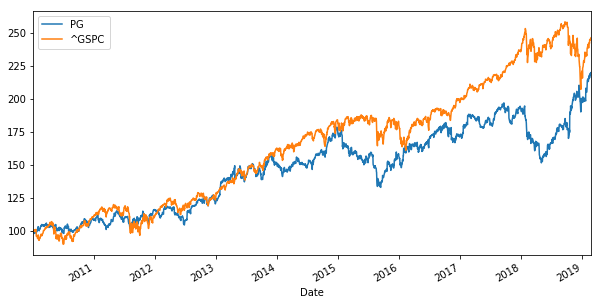

In [3]:
# Normalize and visualize
(Portfolio / Portfolio.iloc[0] * 100).plot(figsize = (10, 5))

In [5]:
# ---------- STUDY RELATIONSHIPS ---------- #

# Find LROR for each asset
LROR = np.log(Portfolio / Portfolio.shift(1))

# Study mean, covariance, and correlation
print("Average Annualized Return: \n", LROR.mean()*250*100)
print("\nCovariance: \n", LROR.cov())
print("\nCorrelation: \n", LROR.corr())

Average Annualized Return: 
 PG       8.509871
^GSPC    9.819229
dtype: float64

Covariance: 
              PG     ^GSPC
PG     0.000085  0.000047
^GSPC  0.000047  0.000090

Correlation: 
              PG     ^GSPC
PG     1.000000  0.532309
^GSPC  0.532309  1.000000


We can see that both assets demonstrated strong returns over the timespan we are studying. Additionally, the returns are well correlated with a value of 57%. This is what we are looking for.

In [12]:
# ---------- FIND WEIGHTS ---------- #

# Get weights
weights = np.random.random(len(assets))
weights /= np.sum(weights)
print("Weights: ", weights)

# Check sum
if weights.sum() != 1: print("Error: Weights are imbalanced.")
else: pass

Weights:  [0.88077203 0.11922797]
Sum: 	 1.0


In [26]:
# ---------- DETERMINE PORTFOLIO STATS ---------- #

print("Expected Portfolio Statistics \n\n")

# Expected portfolio return
expLROR = round((np.sum(weights * LROR.mean()) * 250 * 100), 4)
print("Rate of Return:\t\t", expLROR, " %")

# Expected variance
expVAR = round((np.dot(weights.T, np.dot(LROR.cov() * 250, weights))), 4)
print("Port Variance:\t\t", expVAR, " %")

# Expected volatility
expVOL = round(( np.sqrt(np.dot(weights.T, np.dot(LROR.cov() * 250, weights))) ), 4)
print("Port Volatility:\t", expVOL, " %")


Expected Portfolio Statistics 


Rate of Return:		 8.666  %
Port Variance:		 0.0193  %
Port Volatility:	 0.1389  %


Now that we have some measurements of the porfolio, we will proceed with creating a plot with over 1000 portfolio combinations of the same two securities with differing weights. Keep in mind that there are only two securities but thousands of weight combinations, not the other way around.

In [37]:
# ---------- DEVELOP MARKOWITZ FRONTIER ---------- #

# Preallocate lists for returns to volatilities
portRET = []
portVOL = []

# Define simulation settings
n = 1000 # Total combinations considered

# Run the simulation
for x in range(n):
    
    # Randomly assign weights
    weights = np.random.random(len(assets))
    weights /= np.sum(weights)
    
    # Find portfolio return
    portRET.append(np.sum(weights * LROR.mean()) * 250)
    
    # Find portfolio volatility
    portVOL.append(np.sqrt(np.dot(weights.T, np.dot(LROR.cov() * 250, weights))))
    
# Convert data to arrays
portRET = np.array(portRET)
portVOL = np.array(portVOL)

# Print sample outputs
print("Portfolio Returns: \t", portRET[0:4], "...")
print("Portfolio Volatilities: ", portVOL[0:4], "...")


Portfolio Returns: 	 [0.09391151 0.09087033 0.09055281 0.09119817] ...
Portfolio Volatilities:  [0.1324771  0.12945365 0.12962574 0.12937334] ...


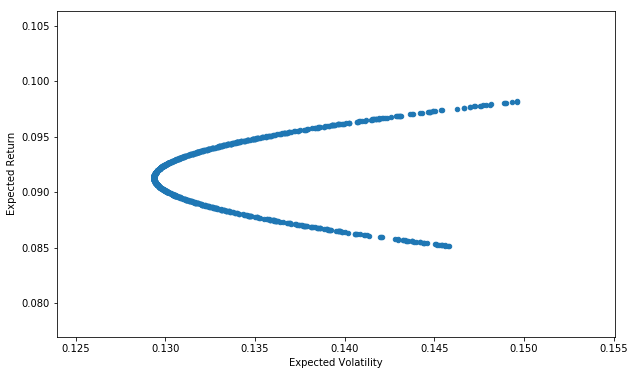

In [36]:
# ---------- VISUALIZE RESULTS ---------- #

# Convert arrays into DataFrame
Marko = pd.DataFrame({'Return' : portRET, 'Volatility' : portVOL})

# Create plot
Marko.plot(x = 'Volatility', y = 'Return', kind = 'scatter', figsize = (10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.show()


Wow, that's really beautiful. This concludes the end of the Udemy lecture but I will return to complete a more complex evaluation of larger portfolios.

**AREAS FOR FURTHER DEVELOPMENT:**
* **Investigate Portfolios as $n \rightarrow \infty$**
  * Add more securities to the portfolio combinations.
  * Do the portfolios fall away from the frontier?
* **Add Sharpe Ratio Coloring**
  * Add color-coding for the Sharpe ratios of the hypothetical portfolios, as in the figure above.
  * Comment on Sharpe phenomenon along the frontier.
* **Add Index Functionality**
  * For a given volatility or a given expected return, return the efficient portfolio weights.
* **Compartmentalize into Functions**
  * Turn the code above into a suite of functions to make this analysis less arduous.

*Notes prepared by Austin Dial on 2/26/2019, rev. 3/19*